In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as text

## Linear regression

In this notebook we will consider a simple linear regression model: 

$$ y_i = x_{ij} w_j + b$$

We will be using the "sumation conventions": when an index is repeated the sumation over this index is implied:

$$ 
x_{ij} w_j \equiv   \sum_j x_{ij} w_j 
$$

#### Problem 1

Implement function `linear(x,w,b)` that given feature matrix $\mathbf{x}$, weights $\mathbf{w}$ and bias $b$  returns $\mathbf{y}$. **Hint** Use matrix multiplication operator `@`.  

In [3]:
def linear(w, x, b):
    return np.matmul(x, w) + b

### Data

#### Problem 2

Generate a random feature matrix $\mathbf{x}$ witch 10000 samples and three features,  
such that first feature is drawn from N(0,1), second feature from  U(,1) and third from N(1,2).

$N(\mu,\sigma)$ denotes normal distribution with mean $\mu$ and standard deviation $\sigma$. To generate random numbers you can use `numpy.random.normal` and `numpy.random.uniform` functions. To collect all features together you can use `numpy.stack` function. 

In [4]:
x = np.hstack((np.random.normal(0, 1, size=(10000, 1)), np.random.uniform(high=1, size=(10000, 1)), np.random.normal(1, 2, size=(10000, 1))))
x.shape

(10000, 3)

Then using $\mathbf{x}$, weights $w_{true}$  and  bias $b_{true}$:  

In [5]:
w_true = np.array([0.2, 0.5,-0.2])
b_true = -1
w_true.shape

(3,)

generate output $\mathbf{y}$ assuming a normaly distributed $N(0,0.1)$ noise $\mathbf{\epsilon}$. 

$$ y_i =  
x_{ij} w_j+b +\epsilon_i 
$$

In [6]:
epsilon = np.random.normal(0, 0.1, size=(10000, ))
epsilon.shape

(10000,)

In [7]:
y = linear(w_true, x, b_true) + epsilon
y.shape

(10000,)

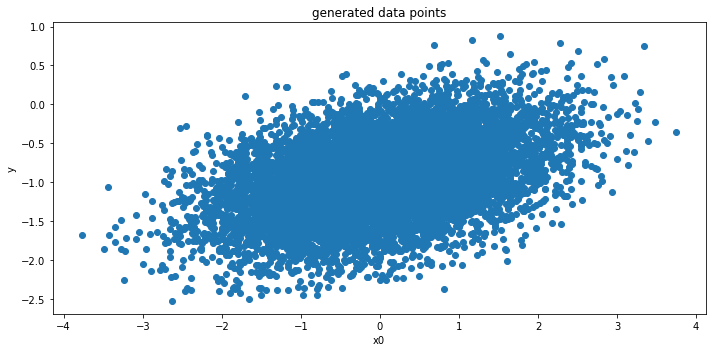

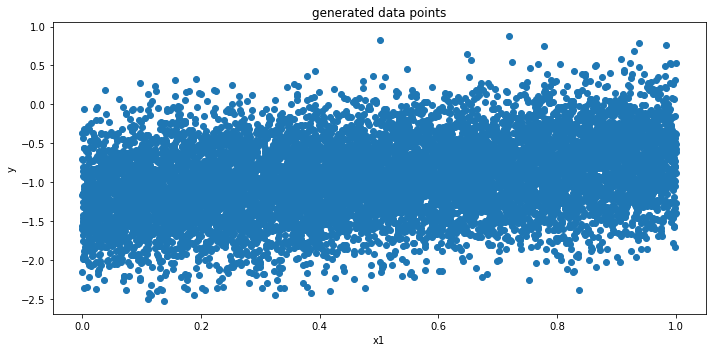

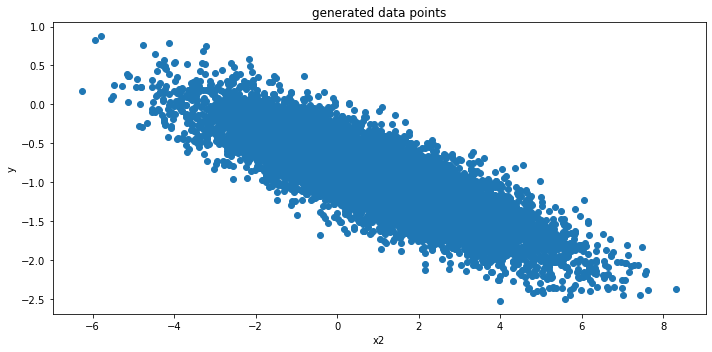

In [8]:
for i in range(x.shape[1]):
    plt.figure(figsize=(10, 5))
    plt.title('generated data points')
    plt.xlabel(f'x{i}')
    plt.ylabel('y')
    plt.scatter(x[:, i], y)
    plt.tight_layout()

## Shapes

In [9]:
print('w', w_true.shape)
print('x', x.shape)
print('b', b_true)
print('y', y.shape)

w (3,)
x (10000, 3)
b -1
y (10000,)


#### Problem 3

### Loss

Given the means square loss

$$ MSE(w,b|y,x) = \frac{1}{2}\frac{1}{N}\sum_{i=0}^{N-1} (y_i -  x_{ij} w_j -b  )^2$$

write down the python function `mse(y,x,w,b)` implementing it:

In [10]:
def mse(y, x, w, b):
    return 0.5*(1/x.shape[0])*np.sum( (linear(w, x, b) - y) ** 2 )

In [11]:
mse(y, x, w_true, b_true)

0.005051145025567876

### Gradient

Find the gradient of the loss function with respect to weights $w$ and bias $b$. 

In [12]:
def mse_grad(w, x, b, y):
    h = linear(w, x, b)
    return {
        "dw": (1/x.shape[0]) * np.matmul((h-y), x),
        "db": (1/x.shape[0]) * np.sum((h-y))
    }

In [13]:
grad = mse_grad(w_true, x, b_true, y)
print(grad['db'])
print(grad['dw'])

-0.0011623064218281708
[ 0.00036968 -0.00051287  0.00025691]


#### Bonus problem 

Solve numerically the equations 

$$\frac{\partial}{\partial w_k} MSE(w,b|y,x) = 0,\quad \frac{\partial}{\partial b} MSE(w,b|y,x) = 0$$

for $w_k$ and $b$.  You can use the `numpy.linalg.solve` to solve the linear equation. 

In [14]:
x_bar = x.mean(0)
y_bar = y.mean()
X = np.transpose(x) @ x / len(x)
Y = y @ x /len(y)
A = X - np.multiply.outer(x_bar, x_bar)
w = np.linalg.solve(A,Y-y_bar*x_bar)
b = y_bar - x_bar@w
print(w,b)

[ 0.19963136  0.49919964 -0.20035727] -0.9980714911194253


#### Problem 4

Implement functions `grad_w(y,x,w,b)` and `grad_b(y,x,w,b)` implementing those gradients.  

### Gradient descent 

#### Problem 5

Implement gradient descent for linear regression. Starting from 

In [15]:
w = np.asarray([0.0,0.0,0.0], dtype='float64')
b = 1.0 
learning_rate = 0.2
epoch_count = 0
while mse(y, x, w, b) >= 0.0075:
    epoch_count+=1
    grad = mse_grad(w, x, b, y)
    print('dw', grad['dw'])
    print('db', grad['db'])
    w = w - learning_rate * grad['dw']
    b = b - learning_rate * grad['db']
    print(mse(y, x, w, b))
print('Epochs: ', epoch_count)

dw [-0.20038996  0.93025375  2.82973159]
db 1.9550435488738096
0.7047247626952136
dw [-0.15934439  0.38778249 -0.57252705]
db 0.8900360684101758
0.47797964223288186
dw [-0.12860051  0.33178073 -0.20687567]
db 0.7911380910209541
0.3339753311369388
dw [-0.1036079   0.25223797 -0.19071833]
db 0.6424451561128168
0.23910889224224294
dw [-0.08347958  0.19108034 -0.15251808]
db 0.5280788292479569
0.1764332993812913
dw [-0.06725144  0.14144983 -0.12383346]
db 0.4348160141082879
0.13487704160742783
dw [-0.05416888  0.10145355 -0.10040001]
db 0.35924544049797624
0.10718056226014946
dw [-0.04362175  0.06923019 -0.08143936]
db 0.2979499219644391
0.08858347147170273
dw [-0.03511849  0.04330185 -0.06608119]
db 0.24822080683180944
0.0759640826000815
dw [-0.0282629   0.02246908 -0.05364221]
db 0.20785925353108903
0.06727521242515835
dw [-0.02273562  0.00576077 -0.04356714]
db 0.17508502413529742
0.061174236960511726
dw [-0.01827925 -0.00760951 -0.03540646]
db 0.14845636658354971
0.05678051961619667
dw

db 0.010941252736153206
0.009013320269554082
dw [ 9.25578583e-05 -1.98795390e-02 -2.02191521e-04]
db 0.010799936402534314
0.00891160458572294
dw [ 9.13623940e-05 -1.96227766e-02 -1.99580020e-04]
db 0.010660445307770166
0.008812499435757092
dw [ 9.01823693e-05 -1.93693305e-02 -1.97002252e-04]
db 0.010522755875488342
0.008715937820283333
dw [ 8.90175849e-05 -1.91191579e-02 -1.94457780e-04]
db 0.010386844834158623
0.008621854459467925
dw [ 8.78678441e-05 -1.88722165e-02 -1.91946173e-04]
db 0.01025268921309217
0.008530185748884598
dw [ 8.67329528e-05 -1.86284646e-02 -1.89467008e-04]
db 0.010120266338505301
0.008440869716515214
dw [ 8.56127192e-05 -1.83878609e-02 -1.87019864e-04]
db 0.009989553829642816
0.008353845980853985
dw [ 8.45069540e-05 -1.81503649e-02 -1.84604328e-04]
db 0.00986052959496008
0.008269055710086973
dw [ 8.34154706e-05 -1.79159363e-02 -1.82219991e-04]
db 0.009733171828360586
0.008186441582319227
dw [ 8.23380845e-05 -1.76845356e-02 -1.79866451e-04]
db 0.009607459005486797

How many epochs did you need to get MSE below 0.0075 ? 

#### Problem 6

Implement stochastic gradient descent (SGD).

In [16]:
w = np.asarray([0.0,0.0,0.0], dtype='float64')
b = 1.0 

Starting from same parameters as above and 

In [17]:
batch_size = 100

how many epochs did you need to get MSE below 0.0075 ?  

In [18]:
learning_rate = 0.2
epoch_count = 0
while mse(y, x, w, b) >= 0.0075:
    epoch_count+=1
    temp = np.random.randint(x.shape[0], size=batch_size)
    temp_x = x[temp]
    temp_y = y[temp]
    grad = mse_grad(w, temp_x, b, temp_y)
    print('dw', grad['dw'])
    print('db', grad['db'])
    print('temp', temp)
    w = w - learning_rate * grad['dw']
    b = b - learning_rate * grad['db']
    print(mse(y, x, w, b))
print('Epochs: ', epoch_count)

dw [-0.71729979  0.92103992  2.77000468]
db 1.9924389335365706
temp [8750  796 8122 8862 7567  196 9027 6510 9048 6894 1538 1379  139 2549
 3743 9100 9601 2646   34 5803 7625   79 4544 6827 8144 4267 6604 1263
 2607 5464 7530 1957 8235  963 4423 2001 7782    1 7999 7524  138 8271
 7539 2469 2756 4219  801 6500 5781 7685 5814 7422 6323 1133 3461 1413
 7311 7190 3619 5793 5003 9471  928 2762 1536 9287 6252 4862  329 6024
 2762 3032 8682 7510 9526 5154 6644 8095 6196 8518 2053 7057 1688 3496
 5827 7935 8970 5081 1008 9226 2081 1150 4317 6195 3721 6564 7294 4010
 7102 1860]
0.6811470079592434
dw [-0.16089341  0.35859772 -0.67661624]
db 0.9455791096576879
temp [9634 6738 8464 1306 4460 3259 1120 3556 9478 6843 1969 2327 9897 9743
 5506 9610 5503 3903 7495 2669 1491 9429 4881 7213 2880 2685 2028 2477
 6243 9369 2432 9774 7932 9181 5204 2881 9560 7848 6194 8667 3415 8605
 2768 9437 7917  809 6609 1180 7849 1798  667 9927  542 9661 4886 1852
 9172 1389 9130 7651 2626  770 8037 8259 1560 6986 8

0.01728045397757033
dw [ 0.01029309 -0.01630426  0.07717385]
db 0.051126377115219016
temp [5600 4636 2312 6058 8170 8201 5625 2126 5433 1655 7000 4286 2640 1905
 3353  380 6462 9855 5360 2367 9327 4044 5221 7894 7889  424 3213 6951
 2054 9570 5581 2811 9647 3733 6573 9906 5291 3746 6431 3394 2375 1943
 8935 1933 1890 4339 2058 5462 3702  727 9285 8140 7306 4044  237 9509
 6721 5310 4903 8807 6083 2192 8306 8391   91 6393 5184 7239  919  301
 1827 6140 6494 8108 5879 7319 9926  269 4763 7227 4213 1888 9212 8119
 5223 3229 1741 5578 9819 6561 6724 3732  666 7325 5673 9852 1320 9647
 2396 2176]
0.01736280122046799
dw [-0.04048485 -0.04286258 -0.08917954]
db 0.017598580213198593
temp [1000 7047 4251  400 5518 1556 7668 4642 6614 7571 7100 2975 4288 7797
 5145 1439 2447  365 1757 8961 4588 5582 9210  822 3408 2560 1636 1638
 1760   36 4261 7543 1825 4275   83 8773 2085 5290 2486 2747 7390 7887
 5237 6442 9200 8877 7479 5201 7460 8954 7563 7047 3529 8022 1393 1223
 3840 4311 3817  409 2602 7

### Pytorch 

#### Problem 7

Implement SGD using pytorch. Start by just rewritting Problem 3 to use torch Tensors instead of numpy arrays. 

To convert frrom numpy arrays to torch tensors you can use ``torch.from_numpy()`` function: 

In [19]:
import torch as t 

In [20]:
def t_linear(w, x, b):
    return t.matmul(x, w) + b


def t_mse(w, x, b, y):
    err = y - t_linear(w, x, b)
    return (err ** 2).mean()

def t_mse_grad(w, x, b, y):
    h = t_linear(w, x, b)
    return {
        "dw": (1/x.shape[0]) * t.matmul((h-y), x),
        "db": (1/x.shape[0]) * t.sum((h-y))
    }

In [22]:
device = 'cuda' if t.cuda.is_available() else 'cpu'
print('device: ', device)
t_y = t.from_numpy(y).double().to(device)
t_x = t.from_numpy(x).double().to(device)
t_w = t.DoubleTensor([0,0,0])
t_b = t.DoubleTensor([1.0])

learning_rate = 0.15
epoch_count = 0

err = t_mse(t_w, t_x, t_b, t_y)

while  err.abs() >= 0.0075:
    epoch_count+=1
    temp = np.random.randint(t_x.shape[0], size=batch_size)
    temp_x = t_x[temp]
    temp_y = t_y[temp]
    grad = t_mse_grad(t_w, temp_x, t_b, temp_y)
    print('dw', grad['dw'])
    print('db', grad['db'])
    print('temp', temp)
    print(err:=t_mse(t_w, temp_x, t_b, temp_y))
    t_w = t_w - learning_rate * grad['dw']
    t_b = t_b - learning_rate * grad['db']
print('Epochs: ', epoch_count)

device:  cpu
dw tensor([-0.1062,  0.8461,  3.3850], dtype=torch.float64)
db tensor(1.9865, dtype=torch.float64)
temp [9532 3151 6413 6047 4340 8795 2378 2887  790 8195 6768  592 9740 3184
 9075  365  277 5045 7163 8664 4073  547 8809 7206 5098 1429 6942 7739
 2400 5577 2946 3567 6406 9679 1193 9182 2176 8459 1640 3926 9057 1367
 6789 9215  748 6433 4524 5992 9740 9764 6745 2448 2367 8130 2604 6733
 1633 7078  410 6785 4811 1986 4534  619 6388 1926 5027 8307  300 3371
  443 1442 7066 6240 8186  147  984 3523 6828 1196 1212 9161 2661 8890
 4262 6070 3132 8428 5646 1137 7212 5233 7169 9378 2572  498 9514 8980
 5004 8767]
tensor(4.2545, dtype=torch.float64)
dw tensor([-0.2309,  0.5472, -0.1341], dtype=torch.float64)
db tensor(1.0623, dtype=torch.float64)
temp [6555 2416 1187 9912 3157 9931 5007 7229 5843 9750 4212 1622  803 3366
 6088 9771 2521 9094 5670 4149 8084 7476 6520 3652 2334 6136 6053 6593
 5274 3887 4577 9219 7651 8306 6079 3102  172 9285 2995 8586 3370 5333
 3434 6989 1046 1314 

db tensor(0.0046, dtype=torch.float64)
temp [6685 4655  688 7275 2635 8077 1829 8332 3669 2456 5614 8879 2479 2805
 1830 9030  271 3258 3158 7297 6454 7535 8666 4934 5390 2388 9440 5333
 5550 3793 9808 3564 9115 9798 4906  389 6792 7661 4248 1412 3217 3718
 3347 7000 9853 7887 8951 4138 8552 8341 4195 4066 6839 6697 2446 7234
 7893 6529 3521 6654 3487 9357 8113 2199 8598 3457 9070 9047 4717 8473
 6686 1478  933 6499 6242 2318 6527 4310  652 8442 1985  632 7019 4460
 1553 4194 5008 5074 4657  211 7326 5816 6410 5709 9640 8430 6786 2058
 6204 3683]
tensor(0.0473, dtype=torch.float64)
dw tensor([ 0.0202, -0.0216,  0.1086], dtype=torch.float64)
db tensor(0.0590, dtype=torch.float64)
temp [2279 5004 9617 5230 1382 5249 1769 6273 8620 6809 1746 6342 8733 6033
 6777 6704  506 2853 3732 6379 7334 9247 2666 3717 9820 3317 7174 3142
 3146 2855 1531 4268 5794 6145 4014 5123 6112 3760  595 2279 9220 1851
 9612 6556  721 7567 4574  167 7667 9638 4706 5747 2758 5035  267 1915
 1573 6613 5591  578 21

temp [9194 7750 4137 3487  149 6412  456 3433 6328 5664 6671 9825 2966 5128
 4029 2122 2839 9718 4977 1466 5697 5149 7885 8963 5312 5973 3808  924
 5643  752 6613 5841 9748 5123 5761 1363 1378 3092 8012 4006 1234 8794
 8518 3763  723  591  551 9747 3086  172 2383 8342 1427 9981 2728 7270
 8577 9007 2530 2793 8084 2925 6739 8752  762  103 7397 2338 8620 4381
 8364 4806 1092 3343 5950 6975  227  320 2793 6512  110 2561 5332 2642
 5879 3420 5696 2916 6425 8475   68 2357 1987 2503 8452 6230   52 6117
 4270 8832]
tensor(0.0170, dtype=torch.float64)
dw tensor([ 0.0069, -0.0193, -0.0185], dtype=torch.float64)
db tensor(0.0139, dtype=torch.float64)
temp [9471 6071 7962 1241  427 3020 5084 3689 6083 1690 9279 1565 2993 2625
 6374 1875 1471 4714  427 5705 2891 1820 1761 7027 4211  930 3692 7590
 8164 9312 4989 6653  652 2399 8933 1002 2162 5700 3542 4462 7246 9125
 5624 8745 5263 5974 9843 5810  507 3758 8133 4395 8538 7128 3553 7558
 7895 1618 3550 2718 6948 3015 6865 2610 7938 9465 8874 5702 8

 3342 9448]
tensor(0.0157, dtype=torch.float64)
dw tensor([ 0.0063, -0.0219, -0.0101], dtype=torch.float64)
db tensor(-0.0059, dtype=torch.float64)
temp [7492 5698 9520 7909 6637 5137 1294 7783  298 2114 4449  586  857 8453
 1273 1483 8144 6871 5784 7984 9495 7671 8078 2402 6208 8573 1492 5643
 9813 8835 4711  836 1305 8974 5753  305 3478 3319 3360 4177 1681 5146
 1060 2591 8501 3067 3045  578 4568 3975 3861 7291 9185 3162 5792 1438
 2194 4707  108 4047  976 8276 5701 7923 5452 4728 2815 6713  756 3620
 7713 6857 6395 9642 8077 5439 1458 6073 9855 5554  120 6295 5229 2482
 4967 7930 1180 3000 3049 4281 5163 1360  510 8648 4046 7830  977 4612
 2117 5418]
tensor(0.0130, dtype=torch.float64)
dw tensor([ 0.0065, -0.0145,  0.0182], dtype=torch.float64)
db tensor(-0.0042, dtype=torch.float64)
temp [3008 3484 3727 1455  975 5317 5831 3720 8010 8948  345 5676 3311 1510
 3369 1318 9236 7977 6221 1894 7253 8403 5290 7365 7635  115 1334 6995
 6060 8612 7878 1390 4686 3737 1817 5211 1576 4283  113

tensor(0.0105, dtype=torch.float64)
dw tensor([0.0021, 0.0093, 0.0487], dtype=torch.float64)
db tensor(0.0231, dtype=torch.float64)
temp [5216 6165 4770 5020 2372 2147 5981  825 4123   30 6859 3510 3190 8771
 5635 7465  773 4716 6688   65 3766 2756 7951 7544 1047  329 5228  694
 3387 2946 9549 2249 4582 7831 5568 1623 4189 2403 9239 1880 4448 9184
 7932 5574 7610 4879 4311 6336 7675 3268 2076 1216 8391 3990 6543 6113
  739 6704 9193 1576 1922 8602 4246 1816 4301 6240 4959 2930 8429 8399
 6591 7843 4178  365 3319 7200 3716 4068 8374 9955 9422 5314 9402 5683
 2869 2364 3242 7003 5670 3504 8498 2248 8157 3592 2404 6734 3663 2133
 6227 3283]
tensor(0.0107, dtype=torch.float64)
dw tensor([ 0.0159, -0.0133, -0.0380], dtype=torch.float64)
db tensor(-0.0072, dtype=torch.float64)
temp [4502 5496 2332 6834 6881 8317 9632 1111 7067 8903 3427 7620 6807 3157
 5191 1145   94 4963 4351 2754 3757 1118 4000 1686 3470 9420 8950 9751
 2452 3619 3108 7670 8656 6918  849 1935 9947 5763 8695 9408 3648  341


#### Problem 8 

Implement SGD using pytorch automatic differentiation.

To this end the variable with respect to which the gradient will be calculated, ``t_w`` in this case, must have attribute
``requires_grad`` set to ``True`` (``t_w.require_grad=True``).

The torch will automatically track any expression containing ``t_w`` and store its computational graph. The method ``backward()`` can be run on the final expression to back propagate the gradient e.g. ``loss.backward()``. Then the gradient is accesible as ``t_w.grad``.

In [23]:
device = 'cuda' if t.cuda.is_available() else 'cpu'
print('device: ', device)
t_y = t.from_numpy(y).double().to(device)
t_x = t.from_numpy(x).double().to(device)
t_w = t.DoubleTensor([0,0,0])
t_b = t.DoubleTensor([1.0])

t_w.requires_grad_()
t_b.requires_grad_()

learning_rate = 0.15
epoch_count = 0

err = t_mse(t_w, t_x, t_b, t_y).abs()
while err.abs() >= 0.0075:
    epoch_count+=1
    temp = np.random.randint(t_x.shape[0], size=batch_size)
    temp_x = t_x[temp]
    temp_y = t_y[temp]
    loss = t_mse(t_w, temp_x, t_b, temp_y)
    loss.backward()
    print('dw', t_w.grad)
    print('db', t_b.grad)
    print('temp', temp)
    err = t_mse(t_w, temp_x, t_b, temp_y)
    print('mse', err)
    with t.no_grad():
        t_w -= learning_rate * t_w.grad
        t_b -= learning_rate * t_b.grad
        
    t_w.grad.zero_()
    t_b.grad.zero_()
print('Epochs: ', epoch_count)

device:  cpu
dw tensor([-0.1992,  1.6206,  3.4670], dtype=torch.float64)
db tensor([3.6974], dtype=torch.float64)
temp [4753 6354 6386 7997 9728  794 5364 4345 3859 3786 6362 1268 7843 7823
  334 1624 3492 8713 9193 9815 4667 6505  128 1237 3812 2263 4047 7013
 7281  943  799 5353 1134 1247  540 8483 1941 6912 7776 5080 8689 9981
 8899 6435 4111  327 1125 7816 4356 7384 8547 2183 5782 6750 6851 7523
 4749 2428 3225 9982 8875 6391 9989 3983 1245 1952 4427 2448 8711 1262
 4153 8598 2540 4741 1092  796  489 7502 4010 3674 5089 5408 1381 7843
 8106 1846 9305 6202 5939 7869 6311 9492 6236 4086 3003 5338 4910  527
 7301   94]
mse tensor(3.6559, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([-0.2492,  0.6106, -2.3419], dtype=torch.float64)
db tensor([1.6371], dtype=torch.float64)
temp [7984 2166 2356 6040 5268 8580 7059 1821 1382 8893 1821 2145 9651 9462
 3661 9380 8100 1304 9656 1552 4746 2233 9587 1763  891 3260 1135 2603
 3903  899 3246 5062  162 3088 9286 4919 1118 1939 7645 515

mse tensor(0.0165, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([ 0.0490, -0.0212,  0.0861], dtype=torch.float64)
db tensor([0.0698], dtype=torch.float64)
temp [6125 6842 2207 5500 4140 7046 3167 1748 1050 6195 8548 2869 3956 9335
 7905 2110   46 4127 5472 8676 9605 2070 4999 5934 4087 7790 6132 9139
 1524 7031  718 1538 4878 2245  118 7289  288 9571 8897 9868 7758 2289
 1167 2409 6874 6125 6999 1195 3692 1283 2350 6657 1090 3942 4989 6919
 8550 7119 1818 5681 4893 5345 7142 5200   76 5357 1953  166 5809 4907
 8316  471 5047 9544 1133 4361 9625 9303 6724 8434 4758 6555 2207 5205
 3674 2804 1561  362 5270 9680   66 3860 9607 7066 8627 5119  262 2327
 5679 4403]
mse tensor(0.0204, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([-0.0299, -0.0754, -0.0273], dtype=torch.float64)
db tensor([-0.0134], dtype=torch.float64)
temp [7096 4889 9306 7519   92 2815 1160 2681 4543 5617   57 6094  769 9465
  272 2466 8457  187 9294 8102 1789 6035  223 9668 7063 2896 3496 6759
 1783 

mse tensor(0.0089, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([-0.0129, -0.0412,  0.1536], dtype=torch.float64)
db tensor([-0.0071], dtype=torch.float64)
temp [5621 4519 4399 6268 1677 2114 6448 7602 6899   15 6397 2896 6456 9312
 8635 4342 5295 7260  865 7535  545 7528 7264 2137 2685 1885  768  672
 4586 2704 7910 6524 2500 8069 6839 4383 5321 6404 8287 2012 8140 5521
 4694 5011  840 2258 9941 8898 8597 9771 6878 3069 7850 8131 3594 4830
 5413 8600 7565 5206 2783 1505 1356 3688 2140 2942 1695 8205 2952 6022
 9157 1954 5168 3889 2995 5822 5195 9168 6186 4289 8570 6180 8039 1051
 6937 7968 3317  506  801 5140 4142 3688 7288 2428 9537 1790  326 9421
 4954 1477]
mse tensor(0.0176, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([-0.0214, -0.0360, -0.1609], dtype=torch.float64)
db tensor([-0.0134], dtype=torch.float64)
temp [1934 4304 3845 8215 9999 1092 5087 9074   25  565 6537 9965 2494 6993
 5607 9870  269 5635 4018 3735 7581 9022 4126 2313 5288 6982  353 2612
 6572

mse tensor(0.0082, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([ 0.0230, -0.0004,  0.0625], dtype=torch.float64)
db tensor([0.0072], dtype=torch.float64)
temp [9825 7589 5026 4740 5181 6887  165 2613 9406 7636 7855 9533 8210 2139
 4287 7940 1639 5167 1451 4658 1184 1719 9091 8489  451 1848  975 2298
 2329 8030 7570 9634 2587 1520 2159 3476 1670 6711 9181 4615 3311 3174
 9279 5673 2797 2353 8990 2820 6366 3077 2763 4946 1336 7052 3028 9072
 1522 3352 9180 8538 7019 1881 3499 1310 8922 1665 7193 2729  134 9260
 2108 1634 8330 9166 9152 7838  550 6581 5387 7467 6544 9346 7265 6894
 7656 3827 9716 5970  113 4490 6229 1872 2850 8167 5320 5276 3188  861
 8654 7776]
mse tensor(0.0096, dtype=torch.float64, grad_fn=<MeanBackward0>)
dw tensor([ 0.0052, -0.0089, -0.0290], dtype=torch.float64)
db tensor([-0.0106], dtype=torch.float64)
temp [ 606  328 4288  764 4237 7552 9595  956 3274 9730  845 8583 1367 6618
  950 5708 3841 5338 5211 7912 8726 3189 8842 8418 7704 1843 3340 9886
 9896 

#### Problem 9 

Implement SGD using pytorch  optimisers. 

In [232]:
t_y = t.from_numpy(y).double().to(device)
t_x = t.from_numpy(x).double().to(device)
t_w = t.DoubleTensor([0,0,0])
t_b = t.DoubleTensor([1.0])
t_w.requires_grad_(True)
t_b.requires_grad_(True)

learning_rate = 0.15
epoch_count = 0

optimizer = t.optim.SGD([t_w, t_b], lr=learning_rate)
loss = t_mse(t_w, t_x, t_b, t_y)
while loss.abs() >= 0.0075:
    epoch_count +=1
    temp = np.random.randint(t_x.shape[0], size=batch_size)
    temp_x = t_x[temp]
    temp_y = t_y[temp]
    loss = t_mse(t_w, temp_x, t_b, temp_y)
    loss.backward() 
    optimizer.step()
    optimizer.zero_grad()
    print('mse: ',loss)
print('epochs: ', epoch_count)
    

mse:  tensor(4.1226, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(1.9193, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(1.1258, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.5247, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.2963, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.2326, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.1478, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.1575, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.1364, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.0868, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.1114, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.0916, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.0717, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.0927, dtype=torch.float64, grad_fn=<MeanBackward0>)
mse:  tensor(0.0695, dtype=torch.float64, grad_fn=<MeanBackwar